# Understanding the "Greengraph" Example

We now know enough to understand everything we did in the initial example.

###Libraries

We can import the relevant libraries, and install them if we need to:

In [144]:
import geopy
import numpy as np
import png
from StringIO import StringIO
import requests
from matplotlib import pyplot as plt
from matplotlib import image as img
%matplotlib inline

###Classes for Greengraph

In [190]:
class Greengraph(object):
    def __init__(self, start, end):
        self.start=start
        self.end=end
        self.geocoder=geopy.geocoders.GoogleV3(domain="maps.google.co.uk")
        
    def geolocate(self, place):
        return self.geocoder.geocode(place, exactly_one=False)[0][1]
    
    def location_sequence(start,end,steps):
      lats = np.linspace(start[0], end[0], steps)
      longs = np.linspace(start[1],end[1], steps)
      return np.vstack([lats, longs]).transpose()

    def green_between(self, steps):
        return [Map(*location).count_green()
                for location in location_sequence(
                    self.geolocate(self.start), 
                    self.geolocate(self.end),
                    steps)]

In [19]:
class Map(object):
    def __init__(self, lat, long, satellite=True, zoom=10, size=(400,400), sensor=False):
        base="http://maps.googleapis.com/maps/api/staticmap?"
  
        params=dict(
            sensor= str(sensor).lower(),
            zoom= zoom,
            size= "x".join(map(str, size)),
            center= ",".join(map(str, (lat, long) )),
            style="feature:all|element:labels|visibility:off"
          )
    
        if satellite:
            params["maptype"]="satellite"
            
        self.image = requests.get(base, params=params).content # Fetch our PNG image data
        self.pixels= img.imread(StringIO(self.image)) # Parse our PNG image as a numpy array
        
    def green(self):
        threshold=1.1
        # Use NumPy to build an element-by-element logical array
        greener_than_red = self.pixels[:,:,1] > threshold* self.pixels[:,:,0]
        greener_than_blue = self.pixels[:,:,1] > threshold*self.pixels[:,:,2]
        green = np.logical_and(greener_than_red, greener_than_blue) 
        return green
    
    def count_green(self):
        return np.sum(self.green())
    
    def show_green(data):
        green = self.green()
        out = green[:,:,np.newaxis]*array([0,1,0])[np.newaxis,np.newaxis,:]
        buffer = StringIO()
        result = img.imsave(buffer, out, format='png')
        return buffer.getvalue()

###Invoking our code and making a plot

In [192]:
mygraph=Greengraph('New York','Chicago')
data = mygraph.green_between(20)
data

[323,
 323,
 323,
 323,
 323,
 323,
 323,
 323,
 323,
 323,
 323,
 323,
 323,
 323,
 323,
 323,
 323,
 323,
 323,
 323]

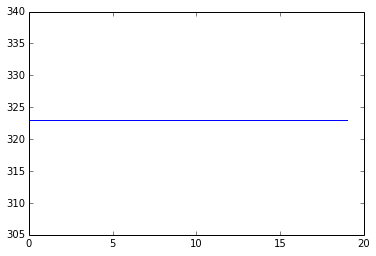

In [193]:
plt.plot(data)